In [1]:
# pip install jupyterlab ipympl
import qgrid
import pandas as pd
from pathlib import Path
import seaborn as sns

In [2]:
DATA = Path('data')

df = pd.read_csv(DATA/'ae_data.csv',encoding='utf8')
df['topWaitTime'] = df['topWait'].copy()
df['topWaitTime']  = df['topWaitTime'].str.replace('> ', '')
df['topWaitTime'][df['topWaitTime']== '< 1'] = 0.5
df['topWaitTime'] = df['topWaitTime'].fillna(0)
df['topWaitTime'] = df['topWaitTime'].astype(float)
df.head()

C:\Users\lrcno\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,seq,topWait,hospTime,hospCoord,hospUrlB5,hospUrlEn,hospUrlGb,pastHours,hospNameB5,hospNameEn,hospNameGb,hospTimeEn,topWaitTime
0,QMH 21/2/2019 9:00am,HK-02,> 2,2019-02-21T09:00:09.29,POINT(114.131259 22.270695),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,瑪麗醫院,Queen Mary Hospital,玛丽医院,21/2/2019 9:00am,2.0
1,AHN 21/2/2019 10:00am,NT-01,> 1,2019-02-21T10:00:01.783,POINT(114.17472 22.458575),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,雅麗氏何妙齡那打素醫院,Alice Ho Miu Ling Nethersole Hospital,雅丽氏何妙龄那打素医院,21/2/2019 10:00am,1.0
2,QMH 21/2/2019 11:00am,HK-02,> 1,2019-02-21T11:00:11.893,POINT(114.131259 22.270695),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,瑪麗醫院,Queen Mary Hospital,玛丽医院,21/2/2019 11:00am,1.0
3,AHN 21/2/2019 12:00pm,NT-01,> 1,2019-02-21T12:00:02.256,POINT(114.17472 22.458575),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,雅麗氏何妙齡那打素醫院,Alice Ho Miu Ling Nethersole Hospital,雅丽氏何妙龄那打素医院,21/2/2019 12:00pm,1.0
4,PYN 21/2/2019 12:00pm,HK-01,> 3,2019-02-21T12:00:01.646,POINT(114.235707 22.269419),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,東區尤德夫人那打素醫院,Pamela Youde Nethersole Eastern Hospital,东区尤德夫人那打素医院,21/2/2019 12:00pm,3.0


In [3]:
widget = qgrid.show_grid(df)

In [4]:
# After upgrading to 1.0.3
def handle_json_updated(event, qgrid_widget):
    # exclude 'viewport_changed' events since that doesn't change the DataFrame
    if (event['triggered_by'] != 'viewport_changed'):
        print(qgrid_widget.get_changed_df())
    (sns.barplot(y='hospNameEn',
             x='topWaitTime',
             data=widget.get_changed_df(),
             orient='h',
             color='red'))
    print(123)
    
    
widget.on('filter_changed', handle_json_updated)

In [5]:
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

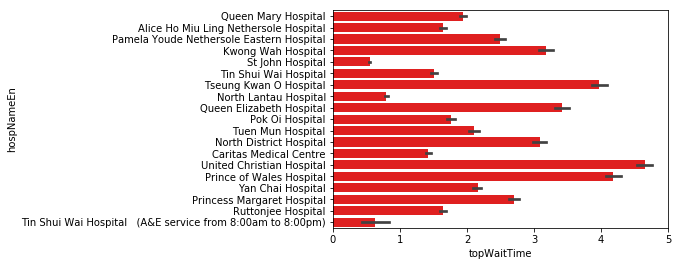

In [6]:
fig = (sns.barplot(y='hospNameEn',
             x='topWaitTime',
             data=widget.get_changed_df(),
             orient='h',
             color='red'))
# fig = fig.set_title('Average waiting Time of Accident & Emergency waiting Time in HK Hospital')
    

In [7]:
fig

In [8]:
import numpy as np
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Series(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09'],index=list(range(9)),dtype='datetime64[ns]'),
    'C' : pd.Series(randn(9),index=list(range(9)),dtype='float32'),
    'D' : np.array([3] * 9,dtype='int32'),
    'E' : pd.Categorical(["washington", "adams", "washington", "madison", "lincoln","jefferson", "hamilton", "roosevelt", "kennedy"]),
    'F' : ["foo", "bar", "buzz", "bippity","boppity", "foo", "foo", "bar", "zoo"] })
df_types['G'] = df_types['F'] == 'foo'
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [10]:
%matplotlib nbagg
import matplotlib.pyplot as plt

n = 50

qgrid_df = qgrid_widget.get_changed_df()
x = qgrid_df.index
y = qgrid_df['C']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
line, = ax.plot(x, fit[0] * x + fit[1], color='red')
scatter, = ax.plot(x,y,ms=8,color='b',marker='o',ls='')

def handle_filter_changed(event, widget):
    qgrid_df = qgrid_widget.get_changed_df()
    x = qgrid_df.index
    y = qgrid_df['C']
    fit = np.polyfit(x, y, deg=1)
    line.set_data(x, fit[0] * x + fit[1])
    fig.canvas.draw()
    scatter.set_data(x, y)
    fig.canvas.draw()

qgrid_widget.on('filter_changed', handle_filter_changed)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lrcno\\AppData\\Roaming\\Python\\Python36\\site-packages\\ipympl\\static\\package.json'

In [11]:
!pip install ipympl